In [77]:
%load_ext autoreload
%autoreload 2
import os
import glob
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
pd.options.display.max_columns = 999
import sys
sys.path.append("../../Code")
import vader
import settings as s
import utils 
import seaborn as sns 
import afinns as af
import s140
import opinion_lexicon as op
import so_cal as sc

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load Data

In [3]:
reviews = pd.read_csv(os.path.join('..','2','len_lang_restrict_reviews.csv'), index_col=0)

# Sentiment analysis tools 

# Afinn - overall

In [6]:
reviews['afinn'] = reviews.comments.map(lambda x: af.get_score(x))

In [33]:
reviews.to_csv('reviews_with_sent.csv')

## Vader - Overall

In [10]:
reviews['vader'] = reviews.comments.map(lambda x: vader.get_score(x))

# S140

In [18]:
s140.save_review_s140(reviews,'reviews')

In [19]:
s140_dir = "s140/overall/out/"

In [24]:
reviews = s140.read_s140_scores(s140_dir, reviews)

225484 Index(['string'], dtype='object')


# SO-CAL

In [23]:
sc.save_review_so_cal(reviews, 'comments')

In [43]:
reviews = sc.get_overall_sent('so_cal/overall/out/file_sentiment.csv', reviews)

## Add opinion Lexicon Scores

In [28]:
reviews['opinion_bow'] = reviews.comments.map(lambda x: op.get_score(x))

In [29]:
reviews['opinion_freq'] = reviews.comments.map(lambda x: op.get_score(x, "freq"))

### AFINN-Sentence Level

In [31]:
reviews['Affin-sentence'] = reviews.comments.map(lambda x: af.get_sentence_level_sent(x))

### Vader sentence Level

In [34]:
reviews['Vader-sentence'] = reviews.comments.map(lambda x: vader.get_sentence_level_sent(x))

### Opinion Lexion BOW Sentence Level 

In [36]:
reviews['opinion_bow-sentence'] = reviews.comments.map(lambda x: op.get_sentence_level_sent(x))

### Opinion Lexion Freq Sentence Level 

In [37]:
reviews['opinion_freq-sentence'] = reviews.comments.map(lambda x: op.get_sentence_level_sent(x, "freq"))

### Sentiment-140 sentence Level

In [41]:
s140.save_review_sentence_short(reviews)

In [46]:
s140_dir = 's140/sent/out/'

In [79]:
reviews['s140-sentence'] = s140.get_sentence_level_sent(s140_dir, reviews)

In [80]:
reviews.to_csv('reviews_with_sent.csv')

### SO_CAL sentence level

In [82]:
sc.save_review_sentence(reviews, 'comments')

In [83]:
so_cal_dir = 'so_cal/sent/out/file_sentiment.csv'

In [262]:
reviews['so_cal-sentence'] = sc.get_sentence_level_sent(so_cal_dir, reviews)

# TEST Translated Comment

## AFINN

In [168]:
eng_reviews['trans-afinn'] = [afinn.score(x) if x != None else x for x in eng_reviews.translated]

In [173]:
eng_reviews[(eng_reviews['afinn'] != eng_reviews['trans-afinn']) & eng_reviews['other_langs'] > 0 ]

,idReview,id,date,reviewer_id,listing_id,recipient_id,comments,len,num_of_sents,langs,langs_conf,cancellation,other_langs,translated,afinn,vader,s140,so_cal,trans-afinn
121,122,51110258,2015-10-18,34843079,2515,2758,A Stephanie foi espectacular.. Fala Inglês e f...,99,12,en,0.999998,N,"[pt, es, pt]",Stephanie was awesome .. Speaks English and Fr...,13.0,0.9613,4.0,1.600000,23.0
1214,1452,198201677,2017-09-28,111165663,5441,7989,Kate is a fantastic host! Her place is close t...,52,6,en,0.999997,N,[es],Kate is a fantastic host!Her place is close to...,8.0,0.8713,4.0,2.900000,10.0
1253,1491,421038,2011-08-05,641269,5586,8526,"We had the most warm, comfortable stay in Susa...",85,5,en,0.999997,N,[sw],"We had the most warm, comfortable stay in Susa...",8.0,0.9453,4.0,3.240000,11.0
1384,1868,120455,2010-10-17,103963,6990,16800,There is no place like home and Cynthia is the...,54,4,en,0.999997,N,"[so, de]",There is no place like home and Cynthia is the...,22.0,0.9870,4.0,3.285714,24.0
1634,2271,3559247,2013-02-17,387126,7241,18583,Super appart. Exactement comme la description....,51,9,en,0.999998,N,"[fr, fr, fr, fr]",Super appart.Exactly like the description.Quar...,11.0,0.9346,4.0,1.533333,15.0
1912,2744,1059237,2012-03-29,1931778,8225,2758,It was my first time using AirBnb. Me and my 9...,109,7,en,0.999997,N,"[pt, pt, pt]",It was my first time using AirBnb.Me and my 9 ...,9.0,0.9484,4.0,2.960000,18.0
1931,2763,7418854,2013-09-19,7180513,8225,2758,Stephanie and her family were very accomodatin...,71,7,en,0.999997,N,[it],Stephanie and her family were very accomodatin...,5.0,0.6992,4.0,2.285714,7.0
2289,3182,2392169,2012-09-24,3225479,9668,32294,Our stay was awesome. Ssameer wasn't there. Bu...,163,13,en,0.999995,N,"[ru, bg]",Our stay was awesome.Ssameer wasn't there.But ...,21.0,0.9933,4.0,2.762500,27.0
2818,4436,12810780,2014-05-12,10431551,12048,7549,Ben is a person who you could spend hours talk...,111,9,en,0.999997,N,"[id, pt]",Ben is a person who you could spend hours talk...,14.0,0.9013,4.0,1.437500,16.0
2862,4480,59997190,2016-01-18,29679161,12048,7549,Ben is a friendly and helpful host. I really e...,63,7,en,0.999997,N,[cy],Ben is a friendly and helpful host.I really en...,19.0,0.9800,2.0,3.000000,16.0


## VADER

In [174]:
eng_reviews['trans-vader'] = [analyzer.polarity_scores(x)['compound'] if x != None else x for x in eng_reviews.translated]

In [176]:
eng_reviews[(eng_reviews['vader'] != eng_reviews['trans-vader']) & eng_reviews['other_langs'] > 0 ]

,idReview,id,date,reviewer_id,listing_id,recipient_id,comments,len,num_of_sents,langs,langs_conf,cancellation,other_langs,translated,afinn,vader,s140,so_cal,trans-afinn,trans-vader
15,16,16302,2009-11-05,44089,2515,2758,What a great location and welcome from Stephan...,87,6,en,0.999996,N,[af],What a great location and welcome from Stephan...,23.0,0.9878,4.0,3.811111,23.0,0.9857
20,21,40150,2010-05-05,24048,2515,2758,My boyfriend and I stayed at the Chez Chic and...,101,10,en,0.999996,N,[sv],My boyfriend and I stayed at the Chez Chic and...,20.0,0.9910,4.0,3.158333,20.0,0.9811
43,44,244065,2011-04-29,351855,2515,2758,We had a great stay with Stephanie and her fam...,47,2,en,0.999996,N,[fr],We had a great stay with Stephanie and her fam...,9.0,0.9686,4.0,2.300000,9.0,0.9654
69,70,1972956,2012-08-13,3057783,2515,2758,Lovely simple room and comfortable bed. Very c...,33,6,en,0.999995,N,"[fr, ca]",Lovely simple room and comfortable bed.Very cl...,20.0,0.9892,4.0,4.366667,20.0,0.9618
81,82,6076486,2013-07-29,6966607,2515,2758,"Great location on Central Park North, close to...",19,3,en,0.999996,N,[no],"Great location on Central Park North, close to...",2.0,0.7574,2.0,1.000000,2.0,0.8268
98,99,14909081,2014-06-29,14330070,2515,2758,Hello I just came back from my trip to NYC. S...,57,6,en,0.999999,N,[sw],Hello I just came back from my trip to NYC.St...,15.0,0.9722,4.0,3.425000,15.0,0.9412
121,122,51110258,2015-10-18,34843079,2515,2758,A Stephanie foi espectacular.. Fala Inglês e f...,99,12,en,0.999998,N,"[pt, es, pt]",Stephanie was awesome .. Speaks English and Fr...,13.0,0.9613,4.0,1.600000,23.0,0.9734
123,124,55214919,2015-11-29,46244196,2515,2758,Nice Place. Close to the Metro! Great Host!,8,3,en,0.999995,N,[ro],Nice Place.Close to the Metro!Great Host!,6.0,0.8168,2.0,2.000000,6.0,0.5242
130,131,67227407,2016-03-27,61961333,2515,2758,Everything was great! Being our first time in ...,496,28,en,0.999997,N,[tl],Everything was great!Being our first time in N...,64.0,0.9980,4.0,1.261762,64.0,0.9968
131,132,68330095,2016-04-04,2599150,2515,2758,Stephanie rulez! Everything was great. Don't b...,16,5,en,0.999995,N,"[ro, so]",Stephanie rulez!Everything was great.Don't be ...,1.0,0.8117,4.0,4.000000,1.0,0.5076


# Clean any reviews with no scores

In [1195]:
eng_reviews = eng_reviews[ncheck == False]

## SenticNet

## Opinion Lexicon

# Distributions

In [39]:
def print_desc_sent(tbl,sent):
    sns.distplot(tbl[sent])
    plt.show()
    sns.boxplot(tbl[sent])
    plt.show()
    print("Average:", np.average(tbl[sent]))
    print("Min:", np.min(tbl[sent]))
    print("Max:", np.max(tbl[sent]))
    print("Variance:", np.var(tbl[sent]))
    print("Std deviation:", np.sqrt(np.var(tbl[sent])))

### AFINN

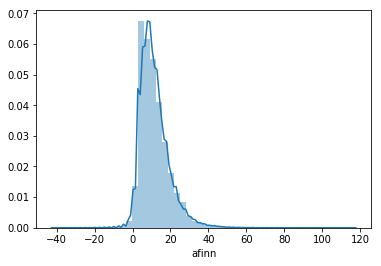

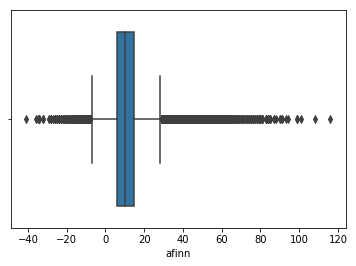

Average: 11.542746220986261
Min: -41.0
Max: 116.0
Variance: 60.300850422374744
Std deviation: 7.765362220938232


In [1333]:
print_desc_sent(eng_reviews, 'afinn')

### VADER

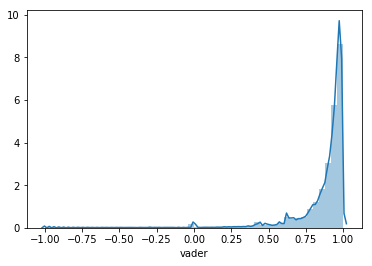

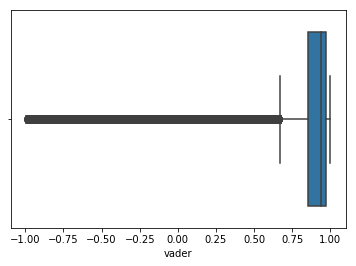

Average: 0.8570008717200363
Min: -0.9964
Max: 0.9996
Variance: 0.05580374373754698
Std deviation: 0.23622816033984387


In [1335]:
print_desc_sent(eng_reviews, 'vader')

### S140

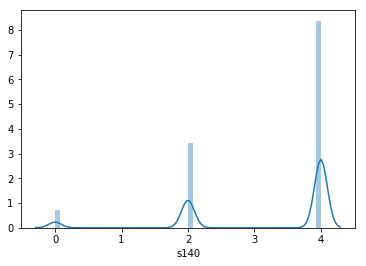

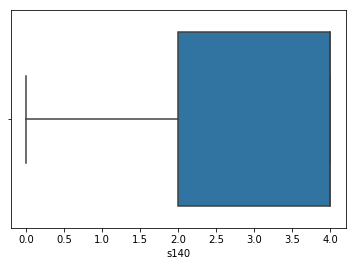

Average: 3.2271703516065973
Min: 0.0
Max: 4.0
Variance: 1.396731966657321
Std deviation: 1.1818341536177235


In [1336]:
print_desc_sent(eng_reviews, 's140')

### SO-CAL

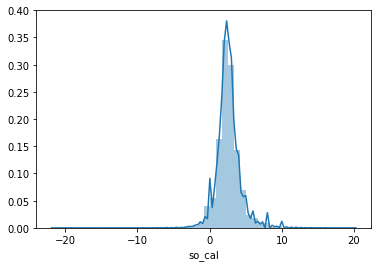

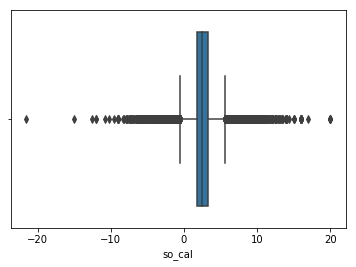

Average: 2.596329210157813
Min: -21.6
Max: 20.0
Variance: 2.572335198336615
Std deviation: 1.6038501171670048


In [1337]:
print_desc_sent(eng_reviews, 'so_cal')

# Normalisations

## Min Max Scaling 

About Min-Max scaling
An alternative approach to Z-score normalization (or standardization) is the so-called Min-Max scaling (often also simply called “normalization” - a common cause for ambiguities).
In this approach, the data is scaled to a fixed range - usually 0 to 1.
The cost of having this bounded range - in contrast to standardization - is that we will end up with smaller standard deviations, which can suppress the effect of outliers.

A Min-Max scaling is typically done via the following equation:

Xnorm=X−XminXmax−Xmin

In [1208]:
def minmaxscale(tbl, col):
    return (tbl[col] - np.min(tbl[col]))/(np.max(tbl[col]) - np.min(tbl[col]))

In [1338]:
norm_mm = eng_reviews.copy()

In [1339]:
norm_mm['afinn'] = minmaxscale(norm_mm, 'afinn')

In [1340]:
norm_mm.head(2)

,idReview,id,date,reviewer_id,listing_id,recipient_id,comments,len,langs,langs_conf,num_of_sents,other_langs,afinn,vader,s140,so_cal,cancellation
0,1,198,2008-10-13,2603,2515,2758,Stephanie was a wonderful host! Her apartment ...,29,en,0.999998,4,0,0.350318,0.9357,4.0,5.520000,N
2,3,1083,2009-03-25,9759,2515,2758,I just got back from a trip to NYC during whic...,222,en,0.999995,11,0,0.337580,0.9648,4.0,1.983333,N


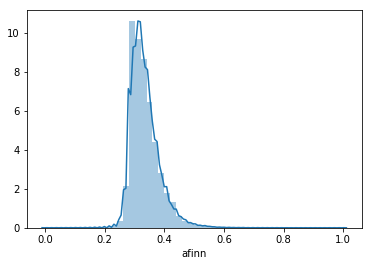

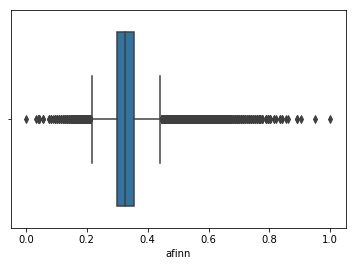

Average: 0.3346671733820782
Min: 0.0
Max: 1.0
Variance: 0.002446381209067107
Std deviation: 0.04946090586581595


In [1341]:
print_desc_sent(norm_mm, 'afinn')

In [1342]:
norm_mm['vader'] = minmaxscale(norm_mm, 'vader')

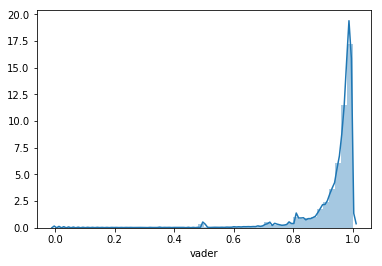

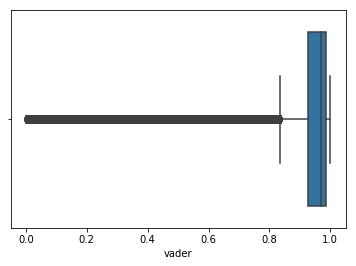

Average: 0.9285575509619419
Min: 0.0
Max: 1.0
Variance: 0.014006907536906085
Std deviation: 0.11835078173339661


In [1343]:
print_desc_sent(norm_mm, 'vader')

In [1344]:
norm_mm.head(2)

,idReview,id,date,reviewer_id,listing_id,recipient_id,comments,len,langs,langs_conf,num_of_sents,other_langs,afinn,vader,s140,so_cal,cancellation
0,1,198,2008-10-13,2603,2515,2758,Stephanie was a wonderful host! Her apartment ...,29,en,0.999998,4,0,0.350318,0.967986,4.0,5.520000,N
2,3,1083,2009-03-25,9759,2515,2758,I just got back from a trip to NYC during whic...,222,en,0.999995,11,0,0.337580,0.982565,4.0,1.983333,N


In [1345]:
norm_mm['s140'] = minmaxscale(norm_mm, 's140')

In [1346]:
norm_mm.head(2)

,idReview,id,date,reviewer_id,listing_id,recipient_id,comments,len,langs,langs_conf,num_of_sents,other_langs,afinn,vader,s140,so_cal,cancellation
0,1,198,2008-10-13,2603,2515,2758,Stephanie was a wonderful host! Her apartment ...,29,en,0.999998,4,0,0.350318,0.967986,1.0,5.520000,N
2,3,1083,2009-03-25,9759,2515,2758,I just got back from a trip to NYC during whic...,222,en,0.999995,11,0,0.337580,0.982565,1.0,1.983333,N


In [1347]:
norm_mm['so_cal'] = minmaxscale(norm_mm, 'so_cal')

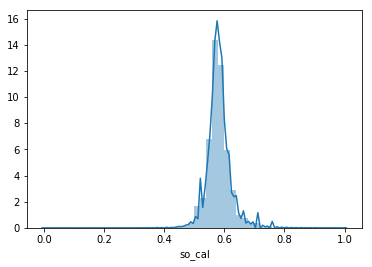

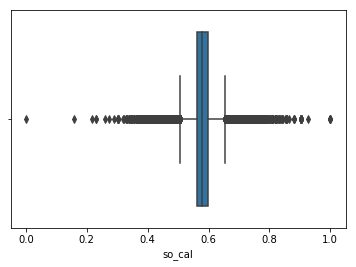

Average: 0.581642529090332
Min: 0.0
Max: 1.0
Variance: 0.0014864178059920401
Std deviation: 0.03855408935498335


In [1348]:
print_desc_sent(norm_mm, 'so_cal')

In [1349]:
norm_mm.head(2)

,idReview,id,date,reviewer_id,listing_id,recipient_id,comments,len,langs,langs_conf,num_of_sents,other_langs,afinn,vader,s140,so_cal,cancellation
0,1,198,2008-10-13,2603,2515,2758,Stephanie was a wonderful host! Her apartment ...,29,en,0.999998,4,0,0.350318,0.967986,1.0,0.651923,N
2,3,1083,2009-03-25,9759,2515,2758,I just got back from a trip to NYC during whic...,222,en,0.999995,11,0,0.337580,0.982565,1.0,0.566907,N


# Average

In [1350]:
norm_mm['avg1'] = (norm_mm['afinn'] +  norm_mm['vader'] + norm_mm['s140'] +  norm_mm['so_cal'])/4

In [1351]:
norm_mm.head()

,idReview,id,date,reviewer_id,listing_id,recipient_id,comments,len,langs,langs_conf,num_of_sents,other_langs,afinn,vader,s140,so_cal,cancellation,avg1
0,1,198,2008-10-13,2603,2515,2758,Stephanie was a wonderful host! Her apartment ...,29,en,0.999998,4,0,0.350318,0.967986,1.0,0.651923,N,0.742557
2,3,1083,2009-03-25,9759,2515,2758,I just got back from a trip to NYC during whic...,222,en,0.999995,11,0,0.337580,0.982565,1.0,0.566907,N,0.721763
3,4,1107,2009-03-27,9193,2515,2758,Stephanie's offered all the most important thi...,58,en,0.999997,2,0,0.343949,0.981463,1.0,0.556624,N,0.720509
4,5,2175,2009-05-09,7048,2515,2758,"Stephanie was really nice, ftiendly and helpfu...",24,en,0.999998,3,0,0.331210,0.966884,1.0,0.582933,N,0.720257
5,6,2889,2009-05-20,12521,2515,2758,I was pleasantly surprised with my whole stay ...,52,en,0.999995,5,[vi],0.331210,0.975200,1.0,0.591346,N,0.724439


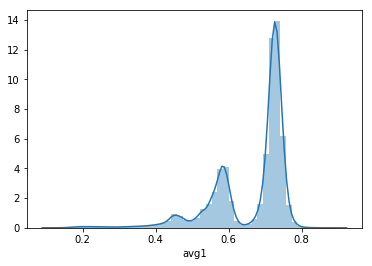

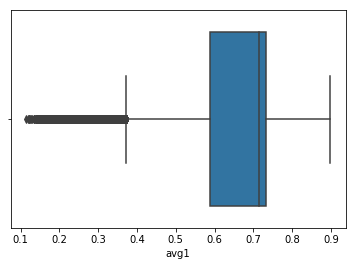

Average: 0.6629149603340002
Min: 0.11381949077199494
Max: 0.8980694679697105
Variance: 0.010303831792086118
Std deviation: 0.10150779178016887


In [1352]:
print_desc_sent(norm_mm, 'avg1')

In [1353]:
norm_mm['avg2'] = (norm_mm['afinn'] +  norm_mm['vader'] +  norm_mm['so_cal'])/3

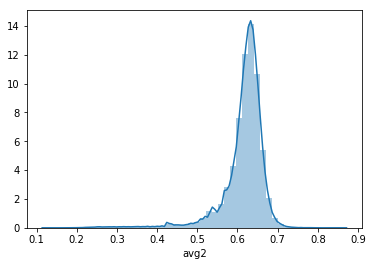

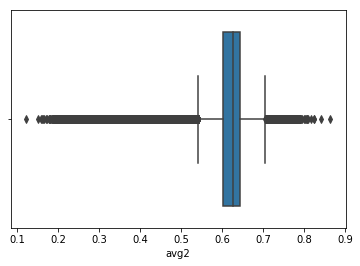

Average: 0.614955751144784
Min: 0.12132736811202022
Max: 0.8640926239596141
Variance: 0.003010751614011229
Std deviation: 0.0548703163286966


In [1354]:
print_desc_sent(norm_mm, 'avg2')

In [1355]:
norm_mm['avg3'] = ( norm_mm['vader'] +  norm_mm['so_cal'])/2

In [1356]:
norm_mm.head()

,idReview,id,date,reviewer_id,listing_id,recipient_id,comments,len,langs,langs_conf,num_of_sents,other_langs,afinn,vader,s140,so_cal,cancellation,avg1,avg2,avg3
0,1,198,2008-10-13,2603,2515,2758,Stephanie was a wonderful host! Her apartment ...,29,en,0.999998,4,0,0.350318,0.967986,1.0,0.651923,N,0.742557,0.656743,0.809955
2,3,1083,2009-03-25,9759,2515,2758,I just got back from a trip to NYC during whic...,222,en,0.999995,11,0,0.337580,0.982565,1.0,0.566907,N,0.721763,0.629017,0.774736
3,4,1107,2009-03-27,9193,2515,2758,Stephanie's offered all the most important thi...,58,en,0.999997,2,0,0.343949,0.981463,1.0,0.556624,N,0.720509,0.627345,0.769043
4,5,2175,2009-05-09,7048,2515,2758,"Stephanie was really nice, ftiendly and helpfu...",24,en,0.999998,3,0,0.331210,0.966884,1.0,0.582933,N,0.720257,0.627009,0.774908
5,6,2889,2009-05-20,12521,2515,2758,I was pleasantly surprised with my whole stay ...,52,en,0.999995,5,[vi],0.331210,0.975200,1.0,0.591346,N,0.724439,0.632586,0.783273


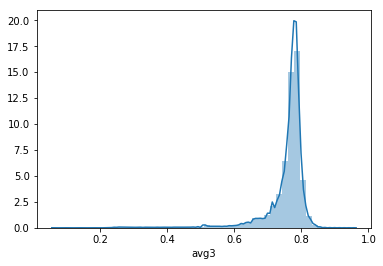

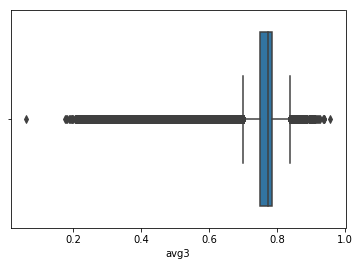

Average: 0.7551000400261373
Min: 0.06097194388777554
Max: 0.9570891783567135
Variance: 0.004570096675355809
Std deviation: 0.06760249015647136


In [1357]:
print_desc_sent(norm_mm, 'avg3')

In [1361]:
norm_mm['avg4'] = (norm_mm['s140'] +  norm_mm['vader'] +  norm_mm['so_cal'])/3

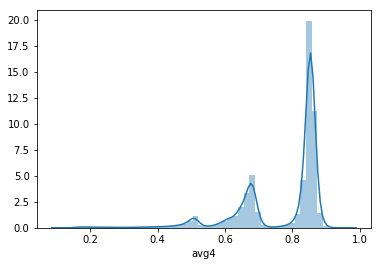

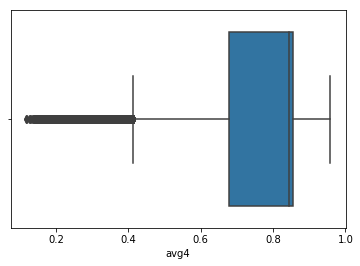

Average: 0.7723308893179746
Min: 0.11707172357535585
Max: 0.9583763681208571
Variance: 0.01604425841523567
Std deviation: 0.12666593233871398


In [1362]:
print_desc_sent(norm_mm, 'avg4')

# Diff 

## Avg 1

### Afinn

In [1363]:
np.sum(np.abs(norm_mm['afinn']- norm_mm['avg1']))

119407.91190169477

In [1364]:
np.sum(norm_mm['afinn']- norm_mm['avg1'])

-119216.31374306415

### Vader

In [1365]:
np.sum(np.abs(norm_mm['vader']- norm_mm['avg1']))

97398.80756887607

In [1366]:
np.sum(norm_mm['vader']- norm_mm['avg1'])

96478.73249015593

### S140

In [1367]:
np.sum(np.abs(norm_mm['s140']- norm_mm['avg1']))

82123.91864286877

In [1368]:
np.sum(norm_mm['s140']- norm_mm['avg1'])

52254.915556295

### SO-CAL

In [1369]:
np.sum(np.abs(norm_mm['so_cal']- norm_mm['avg1']))

39671.42960420503

In [1370]:
np.sum(norm_mm['so_cal']- norm_mm['avg1'])

-29517.334303386597

## Avg 2

### Afinn

In [1]:
np.sum(np.abs(norm_mm['afinn']- norm_mm['avg2']))

NameError: name 'np' is not defined

In [1372]:
np.sum(norm_mm['afinn']- norm_mm['avg2'])

-101798.00855764194

### Vader

In [1373]:
np.sum(np.abs(norm_mm['vader']- norm_mm['avg2']))

115000.3173246596

In [1374]:
np.sum(norm_mm['vader']- norm_mm['avg2'])

113897.03767558474

### SO-CAL

In [1375]:
np.sum(np.abs(norm_mm['so_cal']- norm_mm['avg2']))

18269.260153554802

In [1376]:
np.sum(norm_mm['so_cal']- norm_mm['avg2'])

-12099.02911795649

## Avg 3

### Vader

In [1377]:
np.sum(np.abs(norm_mm['vader']- norm_mm['avg3']))

64595.69947472215

In [1378]:
np.sum(norm_mm['vader']- norm_mm['avg3'])

62998.033396775034

### SO-CAL

In [1379]:
np.sum(np.abs(norm_mm['so_cal']- norm_mm['avg3']))

64595.69947472215

In [1380]:
np.sum(norm_mm['so_cal']- norm_mm['avg3'])

-62998.033396775034

## Avg 4

### S140

In [1381]:
np.sum(np.abs(norm_mm['s140']- norm_mm['avg4']))

60523.31858648477

In [1382]:
np.sum(norm_mm['s140']- norm_mm['avg4'])

12516.144308603914

### Vader

In [1383]:
np.sum(np.abs(norm_mm['vader']- norm_mm['avg4']))

58113.94349873602

In [1384]:
np.sum(norm_mm['vader']- norm_mm['avg4'])

56739.961242472105

### SO-CAL

In [1385]:
np.sum(np.abs(norm_mm['so_cal']- norm_mm['avg4']))

73956.5093482458

In [1386]:
# Afinn - overall

reviews['afinn'] = reviews.comments.map(lambda x: af.get_score(x))

## Vader - Overall

reviews['vader'] = reviews.comments.map(lambda x: vader.get_score(x))

# S140

reviews = reviews.drop("s140", axis=1)

s140.save_review_s140(reviews,'reviews')

s140_dir = "s140/overall/out/"

reviews = s140.read_s140_scores(s140_dir, reviews)

# SO-CAL

sc.save_review_so_cal(reviews, 'comments')

reviews = sc.get_overall_sent('so_cal/overall/out/file_sentiment.csv', reviews)

## Add opinion Lexicon Scores

reviews['opinion_bow'] = reviews.comments.map(lambda x: op.get_score(x))

reviews['opinion_freq'] = reviews.comments.map(lambda x: op.get_score(x, "freq"))

reviews.head(2)

### AFINN-Sentence Level

reviews['Affin-sentence'] = reviews.comments.map(lambda x: af.get_sentence_level_sent(x))

### Vader sentence Level

reviews['Vader-sentence'] = reviews.comments.map(lambda x: vader.get_sentence_level_sent(x))

### Sentiment-140 sentence Level

s140.save_review_sentence_short(reviews,'reviews_uq')

s140_dir = 's140/sent/out/'

reviews['s140-sentence'] = s140.get_sentence_level_sent(s140_dir, reviews)

### SO_CAL sentence level

sc.save_review_sentence(reviews, 'comments')

so_cal_dir = 'so_cal/sent/out/file_sentiment.csv'

reviews['so_cal-sentence'] = sc.get_sentence_level_sent(so_cal_dir, reviews)

### Opinion Lexion BOW Sentence Level 

reviews['opinion_bow-sentence'] = reviews.comments.map(lambda x: op.get_sentence_level_sent(x))

### Opinion Lexion Freq Sentence Level 

reviews['opinion_freq-sentence'] = reviews.comments.map(lambda x: op.get_sentence_level_sent(x, "freq"))np.sum(norm_mm['so_cal']- norm_mm['avg4'])

-69256.10555108251

# Needs to be moved

### How many unique languages detected

In [30]:
len(reviews['langs'].unique())

44

### Which Reviews have languages that are unknown?

In [31]:
reviews[reviews['langs'] =='unk'].head()

,idReview,id,date,reviewer_id,listing_id,recipient_id,comments,len,num_of_sents,langs,langs_conf
3895,6809,217296687,2017-12-08,4894631,15711,61491,👌🏼,1,1,unk,0.0
6399,12279,146656895,2017-04-23,113471646,27024,3227,-,1,1,unk,0.0
7565,16605,7913554,2013-10-08,6588502,41959,140272,:(,1,1,unk,0.0
7706,16746,127177546,2017-01-16,101474773,41959,140272,:),1,1,unk,0.0
8675,19047,192543354,2017-09-10,142858402,47199,212722,.,1,1,unk,0.0


In [32]:
len(reviews[reviews['num_of_sents'] > 1])

384957

### Restrict greater than 5 tokens/words and greater than 1 sentence 

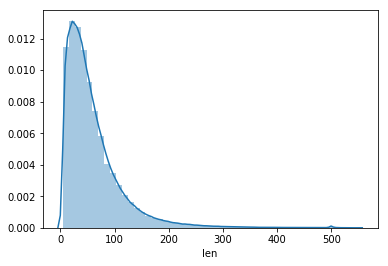

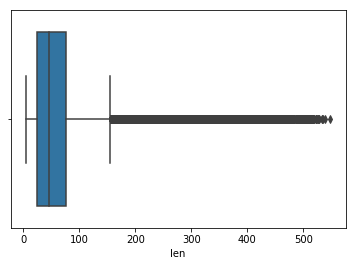

Average: 60.172471131639725
Min: 5
Max: 548
Variance: 2915.79852160788
Std deviation: 53.99813442710665


In [178]:
print_desc_sent(eng_reviews, 'len')

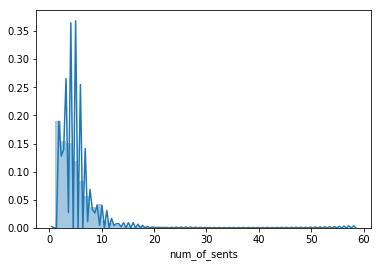

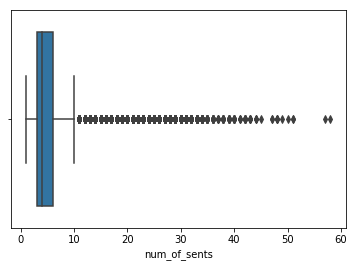

Average: 4.774716215270487
Min: 1
Max: 58
Variance: 10.381879310970403
Std deviation: 3.222092380887054


In [177]:
print_desc_sent(eng_reviews, 'num_of_sents')

### Get Secondary Languages

In [92]:
from googletrans import Translator

In [116]:
def detect_other_langs(com):
    sents = sent_tokenize(com)
    other_langs = []
    for i,s in zip(range(len(sents)), sents):
        try:
            first = str(detect_langs(s)[0]).split(':')
            if len(first)> 1 and first[0] != 'en' and float(first[1]) > 0.999:
                print('Translating')
                other_langs.append(first[0])
                translator = Translator()
                translated = translator.translate(s, dest='en')
                sents[i] = translated.text
        except:
            continue;
    return (other_langs, "".join(sents)) if len(other_langs) > 0 else (0, None)

In [ ]:
eng_reviews = get_other_langs(eng_reviews)

In [122]:
eng_reviews.to_csv('../Data/finalised/reviews.csv')

In [123]:
len(eng_reviews)

357225

In [132]:
utils.get_comments(eng_reviews, 'id', '268306359', 'comments')

"It's very good location. The household is very considerate. The room is very comfortable with all furcilities. Make my stay enjoyable"

In [133]:
len(eng_reviews[eng_reviews['other_langs'] != 0])

20027

# Spelling corrector

In [138]:
from spellchecker import SpellChecker
keys = ['something\'', 's', 'furcilities', 'heire', 'lol']
spell = SpellChecker()
# find those words that may be misspelled
misspelled = spell.unknown(keys)

In [139]:
corrections = {}
for word in misspelled:
    corrections[word] = spell.correction(word)
    

In [140]:
misspelled

{'furcilities', 'heire', "something'"}

In [1]:
corrections

NameError: name 'corrections' is not defined